# Rewarding the original

In [152]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)


In [153]:
# make sure you have the 
import rto

# Filtering and interpolation of axis

### generate some sample data

In [154]:
## generate some samples
nsamples = 20
samples_t = np.cumsum(np.random.uniform(11,500, nsamples).astype(int))
samples_x = 100 * np.random.random((nsamples))

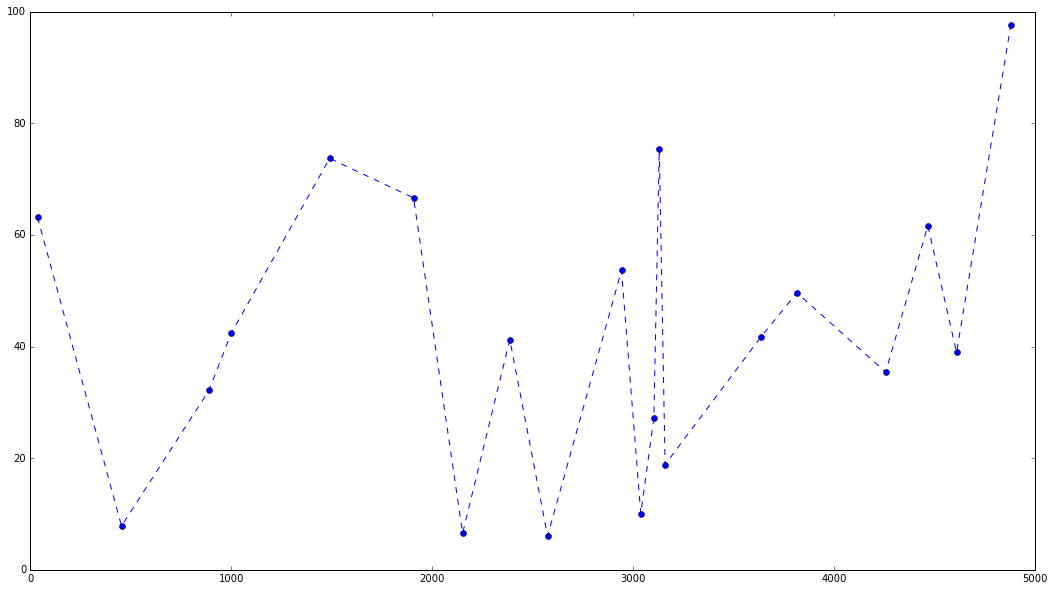

In [155]:
plt.plot(samples_t, samples_x, linestyle='--', marker='o')

In [156]:
samples_t

array([  36,  454,  889, 1000, 1490, 1908, 2152, 2387, 2575, 2943, 3039,
       3104, 3131, 3160, 3636, 3816, 4258, 4468, 4611, 4881])

## filter with axisfilter

The input paramters are stepsize, order and window. In this example case, order doesn't  matter since we are plotting only the position. Stepsize tells the step for linear interpolation between last sample and current sample, window tells the number of sample taken to average over.

In [157]:
axisfilter_0 = rto.AxisFilter(10, 2, 20)
axisfilter_1 = rto.AxisFilter(10, 2, 100)

In [158]:
t, x = [],[]
axisfilter = axisfilter_0
for sample_t, sample_x in zip(samples_t, samples_x):
    axisfilter.new_sample(sample_t, sample_x)
    t = np.hstack((t, axisfilter.interpolator.time_steps))
    x = np.hstack((x, axisfilter.samples[:,0]))
t0, x0 = t.copy(), x.copy()
    
t, x = [],[]
axisfilter = axisfilter_1
for sample_t, sample_x in zip(samples_t, samples_x):
    axisfilter_1.new_sample(sample_t, sample_x)
    t = np.hstack((t, axisfilter.interpolator.time_steps))
    x = np.hstack((x, axisfilter.samples[:,0]))
t1, x1 = t.copy(), x.copy()


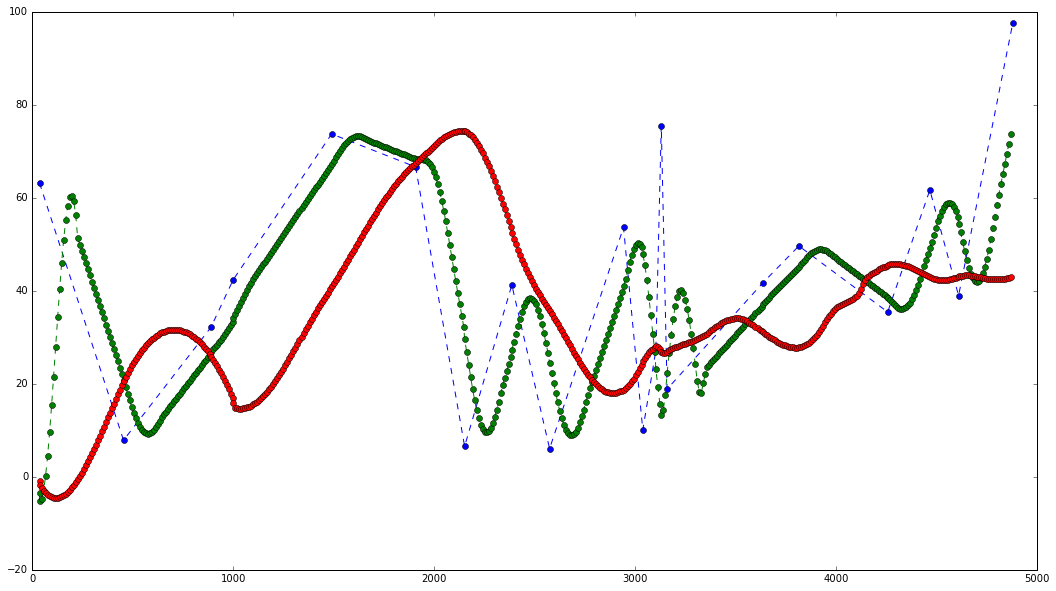

In [159]:
plt.plot(samples_t, samples_x, t0, x0, t1, x1, linestyle='--', marker='o')

# Using MotionExplorer

In [160]:
import rto

In [161]:
rto = reload(rto)

In [221]:
## generate some samples
nsamples = 100
samples_t = np.cumsum(np.random.uniform(11,100, nsamples).astype(int))
samples_x = np.hstack((50 * np.random.random((nsamples/2)), 150 * np.random.random((nsamples/2))))

In [233]:
mexp = rto.MotionExplorer(inputdim = 1, order = 2, start_buffer = 1, periodic_recompute = 1)

In [234]:
t, x, d = [],[],[]
for sample_t, sample_x in zip(samples_t, samples_x):
    d_, _ = mexp.new_sample(sample_t, (sample_x, ))
    d = np.hstack((d, [d_]))
    t = np.hstack((t, mexp.axis[0].interpolator.time_steps))
    x = np.hstack((x, mexp.axis[0].samples[:,0]))

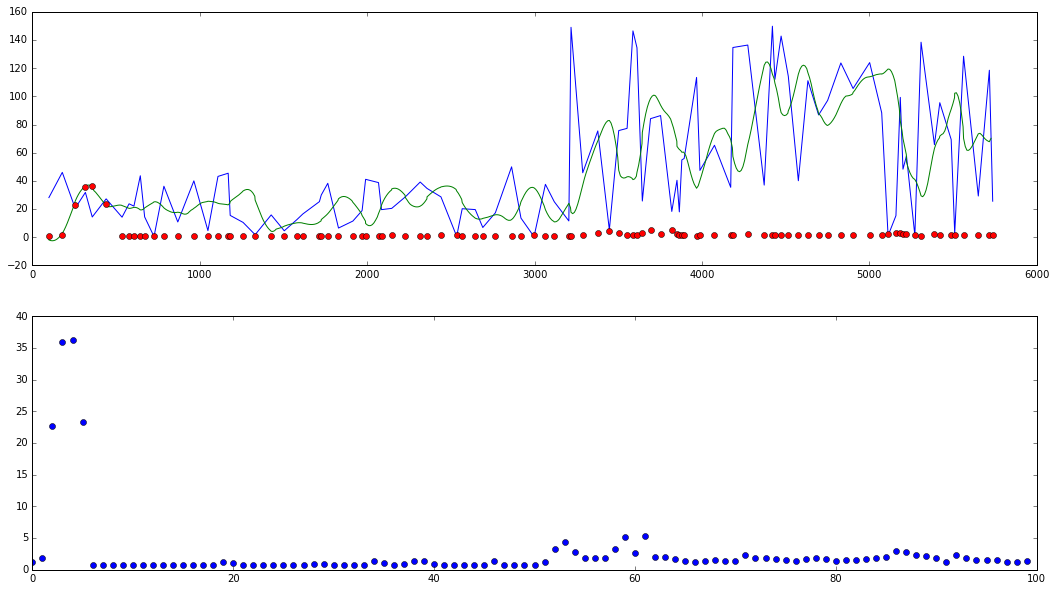

In [236]:
plt.subplot(211)
plt.plot(samples_t, samples_x, t, x, samples_t, d, 'o')
plt.subplot(212)
plt.plot(d, 'o')

# SOM

In [247]:
jake_observations = np.load('jake_observations.npy')

In [240]:
import som
som = reload(som)
som_map = som.SOM(48,48,12)
som_map.learn(jake_observations, epochs=50000)

Epoch 	 0 /	 50000 	Lrate:0.50	 Sigma:10.00
Epoch 	 500 /	 50000 	Lrate:0.48	 Sigma:9.12
Epoch 	 1000 /	 50000 	Lrate:0.46	 Sigma:8.32
Epoch 	 1500 /	 50000 	Lrate:0.44	 Sigma:7.59
Epoch 	 2000 /	 50000 	Lrate:0.42	 Sigma:6.92
Epoch 	 2500 /	 50000 	Lrate:0.40	 Sigma:6.31
Epoch 	 3000 /	 50000 	Lrate:0.38	 Sigma:5.76
Epoch 	 3500 /	 50000 	Lrate:0.36	 Sigma:5.25
Epoch 	 4000 /	 50000 	Lrate:0.35	 Sigma:4.79
Epoch 	 4500 /	 50000 	Lrate:0.33	 Sigma:4.37
Epoch 	 5000 /	 50000 	Lrate:0.32	 Sigma:3.98
Epoch 	 5500 /	 50000 	Lrate:0.30	 Sigma:3.63
Epoch 	 6000 /	 50000 	Lrate:0.29	 Sigma:3.31
Epoch 	 6500 /	 50000 	Lrate:0.27	 Sigma:3.02
Epoch 	 7000 /	 50000 	Lrate:0.26	 Sigma:2.75
Epoch 	 7500 /	 50000 	Lrate:0.25	 Sigma:2.51
Epoch 	 8000 /	 50000 	Lrate:0.24	 Sigma:2.29
Epoch 	 8500 /	 50000 	Lrate:0.23	 Sigma:2.09
Epoch 	 9000 /	 50000 	Lrate:0.22	 Sigma:1.91
Epoch 	 9500 /	 50000 	Lrate:0.21	 Sigma:1.74
Epoch 	 10000 /	 50000 	Lrate:0.20	 Sigma:1.59
Epoch 	 10500 /	 50000 	Lrate:0.19	 

In [239]:
jake_observations.shape

(236, 12)

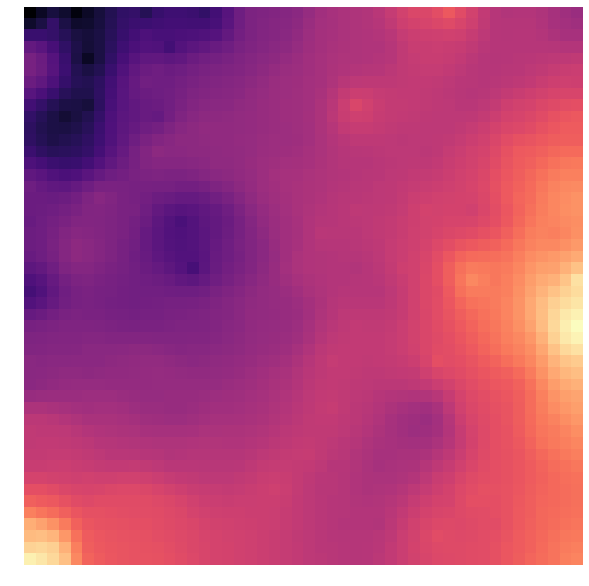

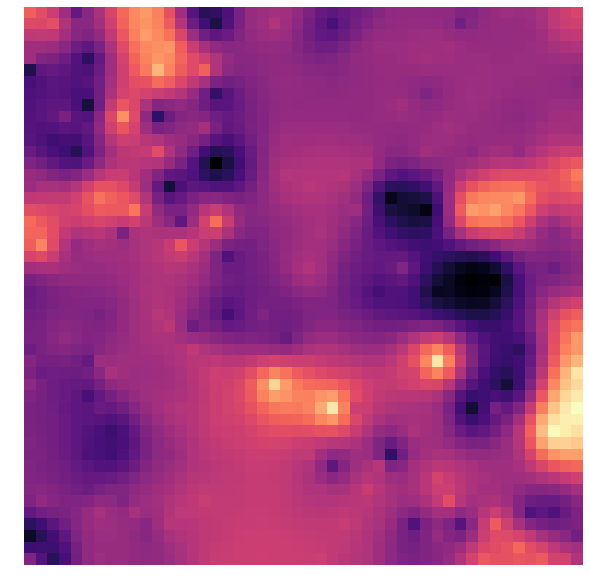

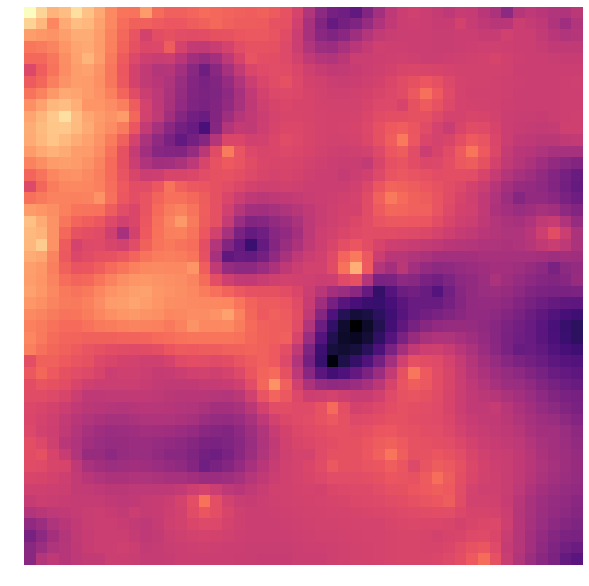

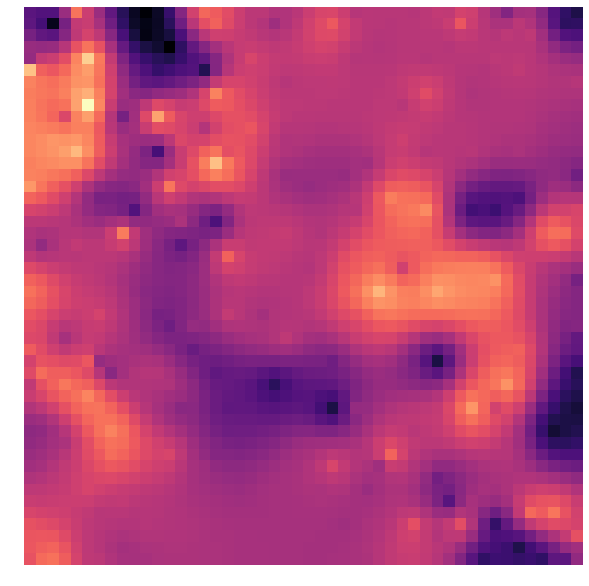

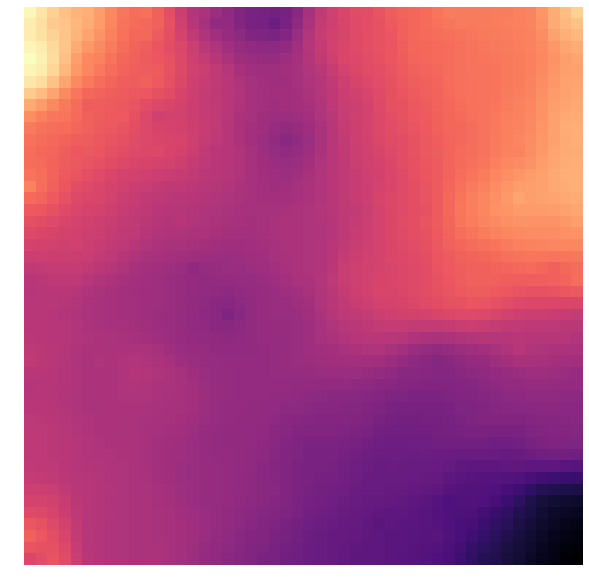

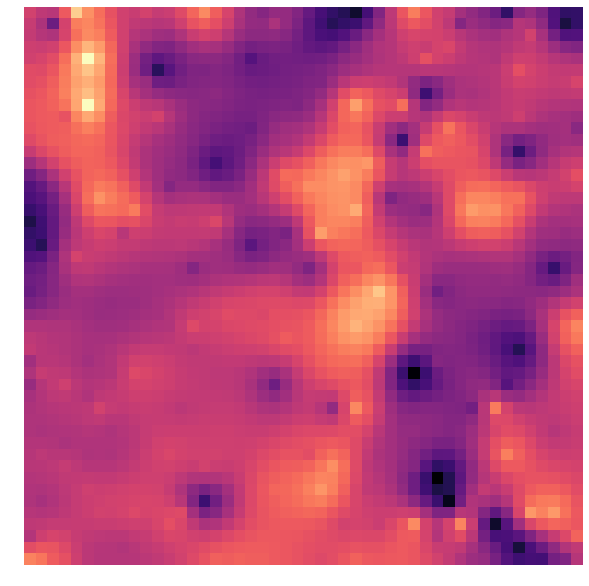

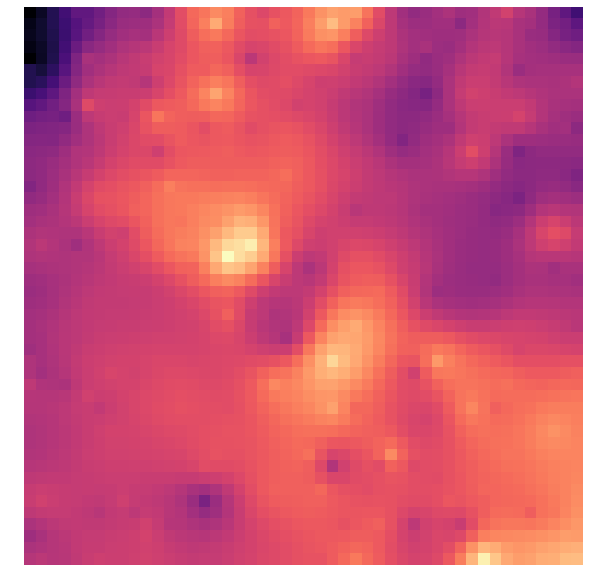

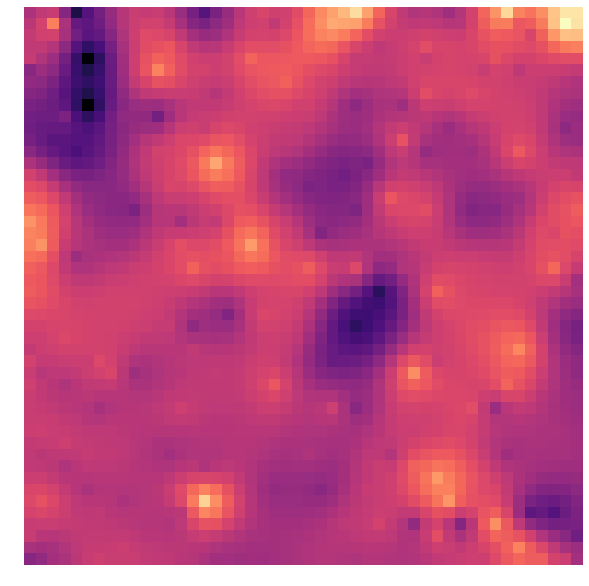

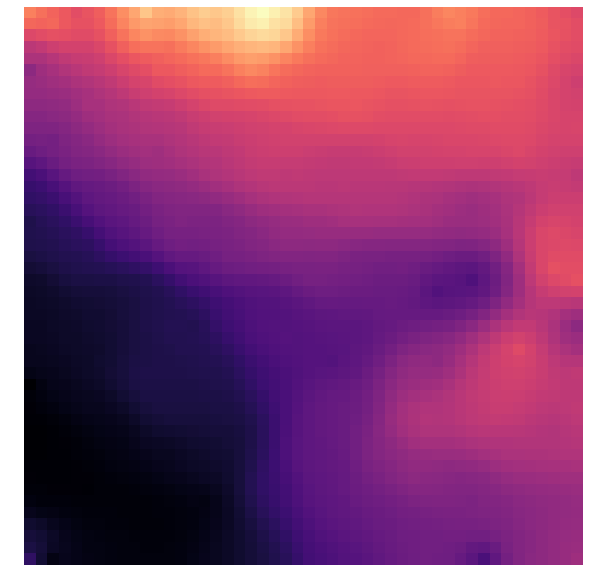

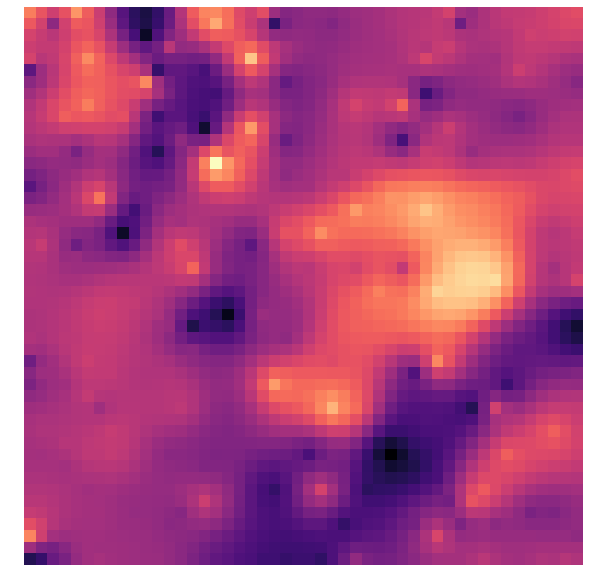

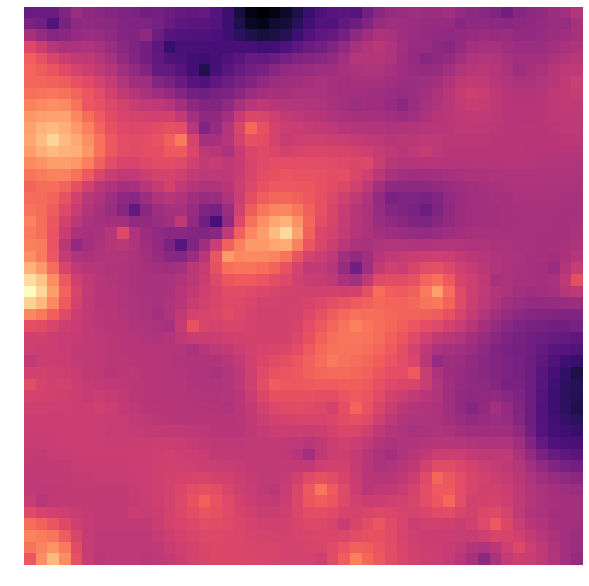

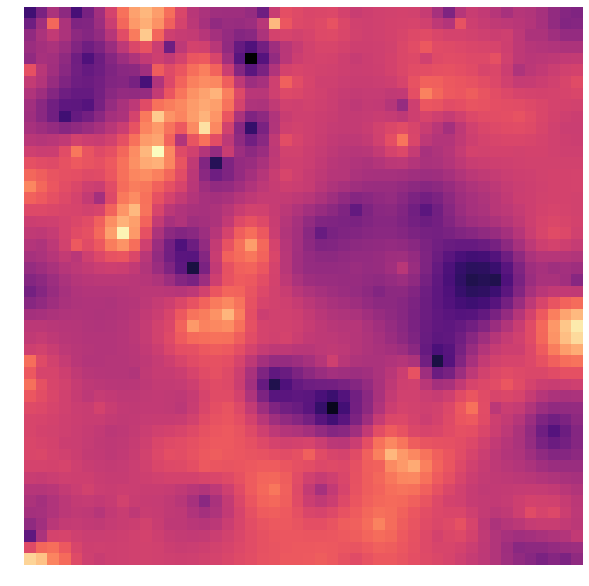

In [244]:
for v in range(12):
    plt.figure()
    plt.imshow(som_map.codebook[:,:,v], cmap="magma", interpolation="nearest")
    plt.axis("off")

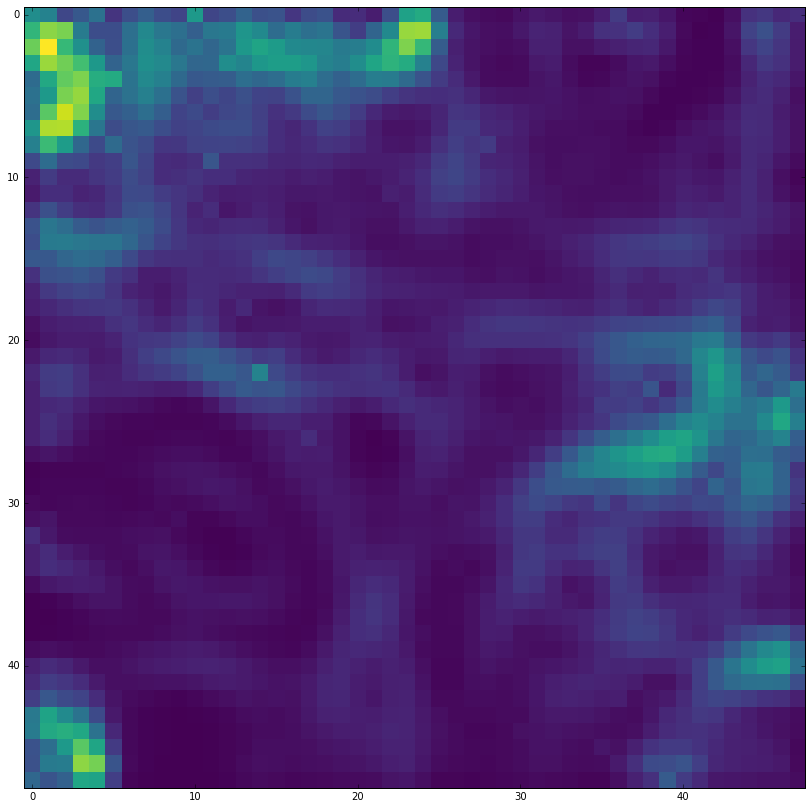

In [245]:
import scipy.spatial.distance

def umatrix(codebook):
    ## take the average HD distance to all neighbours within
    ## certain radius in the 2D distance    
    x_code, y_code = np.meshgrid(np.arange(codebook.shape[0]), np.arange(codebook.shape[1]))
    hdmatrix = codebook.reshape(codebook.shape[0]*codebook.shape[1], codebook.shape[2])    
    hd_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(hdmatrix))**2
    ld_distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(np.vstack([x_code.ravel(), y_code.ravel()]).T))
    return np.mean(hd_distance * (np.logical_and(ld_distance>0,ld_distance<1.5)),axis=1).reshape(codebook.shape[0], codebook.shape[1])
    
plt.figure(figsize=(14,14))    
um = umatrix(som_map.codebook)    
plt.imshow(um, interpolation="nearest", cmap="viridis")
plt.grid("off")

TODO: plot trajectory of rotation around one axis on the SOM